# 1. Data Collection and Manipulation

In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd

folder_path = "./archive/"

In [ ]:
# Create a df with labels and corresponding image name
csv_file_name = "Training_set.csv"
df = pd.read_csv(os.path.join(folder_path, csv_file_name))

# select only 10-15 class for classification
selected_species = ['CRECENT',
                    'ATALA',
                    'ORANGE TIP',
                    'MOURNING CLOAK', 
                    'MILBERTS TORTOISESHELL',
                    'SCARCE SWALLOW',
                    'SLEEPY ORANGE', 
                    'RED CRACKER',
                    'BANDED ORANGE HELICONIAN', 
                    'BROWN SIPROETA', 
                    ]

df = df[df['label'].str.upper().isin(selected_species)].reset_index(drop=True)
display(df)

,filename,label
0,Image_3.jpg,BROWN SIPROETA
1,Image_9.jpg,BROWN SIPROETA
2,Image_30.jpg,ATALA
3,Image_45.jpg,RED CRACKER
4,Image_53.jpg,SCARCE SWALLOW
...,...,...
1011,Image_6467.jpg,BROWN SIPROETA
1012,Image_6469.jpg,ATALA
1013,Image_6482.jpg,ATALA
1014,Image_6496.jpg,MOURNING CLOAK


In [ ]:
# Check if the image format is valid and verify if TensorFlow can load the image, otherwise mark it as invalid.

images_path = "train"
images_folder_path = os.path.join(folder_path, images_path)
invalid_images = []
dataset = []
target_size = (224, 224)

for filename in df['filename']:
    file_path = os.path.join(images_folder_path, filename)
    print(filename)
    if os.path.isfile(file_path):
        
        # Check if the file extension is a supported image format
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            print(f"Invalid Extension for {filename}.")
            invalid_images.append(filename)
            continue

        # Try loading and preprocessing the image
        try:
            img = tf.keras.preprocessing.image.load_img(file_path)  # Load the image
            img = img.resize(target_size)  # Resize to the target dimensions
            numeric_img = tf.keras.preprocessing.image.img_to_array(img)  # Convert image to a numeric array
            numeric_img = numeric_img / 255.  # Normalize pixel values to range [0, 1]
            dataset.append(numeric_img)  # Add the preprocessed image to the dataset
        except Exception as e:
            print(f"Error loading {filename}: {e}.")
            invalid_images.append(filename)
    else:
        print(f"Skipping {filename}, not a file.")
print("images checked")
dataset_np = np.array(dataset)

print()
print("Invalid images list:", invalid_images)

# Update the df with valid images only
df = df[~df['filename'].isin(invalid_images)].reset_index(drop=True)


#-------------------------------------------------------------------
# Delete invalid images from disk (uncomment to enable deletion)

# for invalid_file in invalid_images:
#     file_path = os.path.join(images_folder_path, invalid_file)
#     try:
#         os.remove(file_path)
#         print(f"Deleted: {invalid_file}")
#     except Exception as e:
#         print(f"Failed to delete {invalid_file}: {e}")

Image_3.jpg
Image_9.jpg
Image_30.jpg
Image_45.jpg
Image_53.jpg
Image_59.jpg
Image_72.jpg
Image_73.jpg
Image_74.jpg
Image_92.jpg
Image_97.jpg
Image_104.jpg
Image_105.jpg
Image_107.jpg
Image_111.jpg
Image_120.jpg
Image_129.jpg
Image_141.jpg
Image_143.jpg
Image_148.jpg
Image_150.jpg
Image_153.jpg
Image_170.jpg
Image_177.jpg
Image_191.jpg
Image_198.jpg
Image_211.jpg
Image_212.jpg
Image_220.jpg
Image_225.jpg
Image_234.jpg
Image_237.jpg
Image_251.jpg
Image_253.jpg
Image_259.jpg
Image_266.jpg
Image_272.jpg
Image_275.jpg
Image_276.jpg
Image_278.jpg
Image_283.jpg
Image_286.jpg
Image_292.jpg
Image_295.jpg
Image_297.jpg
Image_309.jpg
Image_313.jpg
Image_317.jpg
Image_323.jpg
Image_334.jpg
Image_341.jpg
Image_349.jpg
Image_359.jpg
Image_373.jpg
Image_375.jpg
Image_380.jpg
Image_381.jpg
Image_382.jpg
Image_391.jpg
Image_397.jpg
Image_398.jpg
Image_403.jpg
Image_406.jpg
Image_408.jpg
Image_413.jpg
Image_430.jpg
Image_443.jpg
Image_448.jpg
Image_454.jpg
Image_458.jpg
Image_471.jpg
Image_472.jpg
Image

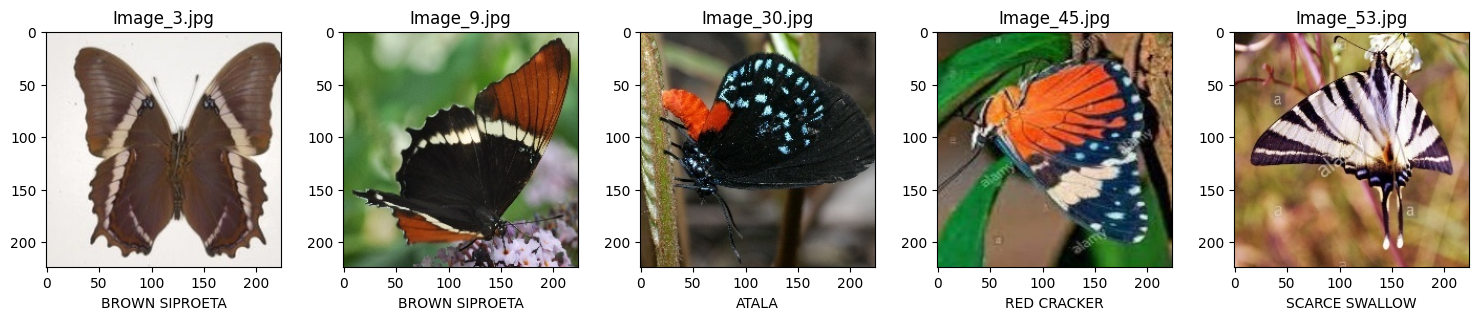

In [ ]:
# check on dataset grid
img_idex = 0
plt.figure(figsize=(15, 3))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(dataset_np[img_idex + i])
    plt.xlabel(df.loc[img_idex + i, 'label'])
    plt.title(df.loc[img_idex + i, 'filename'])

plt.tight_layout()
plt.show()

In [32]:
# Create array for labels
labels = df['label'].values

# change from string label to numeric label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

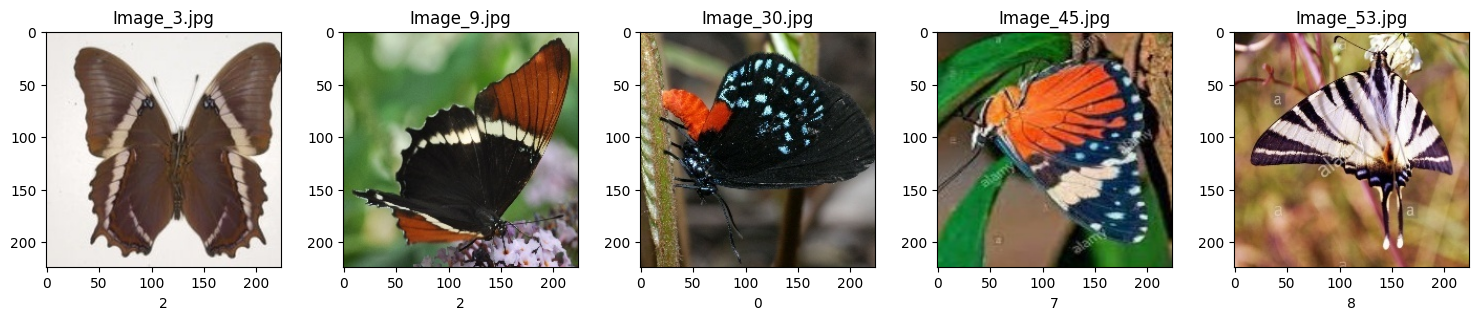

In [33]:
# check on dataset 
img_idex = 0
plt.figure(figsize=(15, 3))  # più largo per mettere 5 immagini di lato

for i in range(5):
    plt.subplot(1, 5, i+1)  # 1 riga, 5 colonne, posizione i+1
    plt.imshow(dataset_np[img_idex + i])
    plt.xlabel(labels_encoded[img_idex + i])
    plt.title(df.loc[img_idex + i, 'filename'])

plt.tight_layout()
plt.show()